## Perceptron

In [13]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [14]:
repetitions = 200
estimate_func = lambda v: unipolar(0, v)
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 1.93750565e-03, -2.52313531e-03,  1.04693453e+00,
          9.72479609e-01, -4.09768257e-02],
        [ 1.89446427e-02,  9.63473090e-01,  4.28588582e-04,
          9.93310708e-01, -3.28897197e-02]]),
 array([[0, 0, 0, 1, 0]]))

In [15]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [19]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [20]:
perceptrons = []
for w_range in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, 0.1, (-w_range, w_range))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,"weights range (-v, v)",epoch count
0,0.010101,7.003
1,0.020202,6.935
2,0.030303,7.071
3,0.040404,7.020
4,0.050505,7.161
...,...,...
94,0.959596,6.789
95,0.969697,7.003
96,0.979798,6.725
97,0.989899,6.746


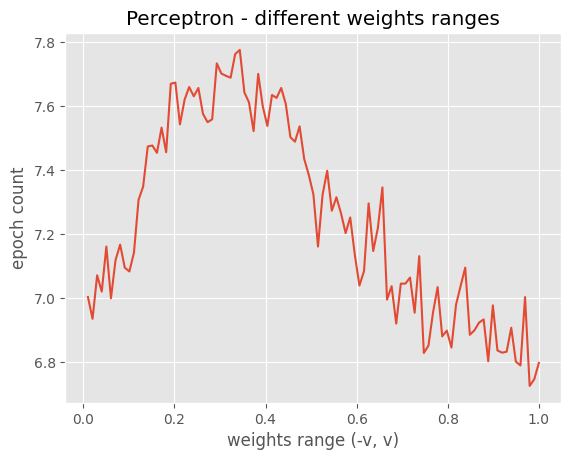

In [23]:
plt.plot([x.wrange[1] for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.title("Perceptron - different weights ranges")
plt.xlabel("weights range (-v, v)")
plt.ylabel("average epoch count")
pd.DataFrame({"weights range (-v, v)":[x.wrange[1] for x in perceptrons], "average epoch count":[x.average_epoch_count for x in perceptrons]})